# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Import Data

In [2]:
# Show charts within notebook
%matplotlib inline

In [3]:
# Folder Path
path = r'C:\Users\jrper\OneDrive\Documents\Career Foundry Data Analytics Program\Achievement 6'

In [4]:
# Import trips_merged_cleaned2.csv
df_trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'CitiBike_PATH_distance.csv'), index_col = False)

# 03. Explore Data

In [5]:
# View first 5 rows for df_trips
df_trips.head()

,Start Station Name,Distance from nearest PATH station via Bicycle,Newark,Grove Street,Hoboken,Harrison,Exchange Place,Journal Square,Newport,starttime_counts
0,5 Corners Library,0.6,7.1,1.4,2.7,7.1,2.0,0.6,1.8,1912
1,Astor Place,1.1,6.4,2.0,3.6,6.3,2.3,1.1,2.9,4038
2,Baldwin at Montgomery,0.8,6.5,1.4,3.0,6.5,1.7,0.8,2.1,5603
3,Bergen Ave,0.9,6.3,1.9,3.5,6.2,2.2,0.9,2.6,3899
4,Brunswick & 6th,0.9,7.6,0.9,2.0,7.6,1.7,1.2,1.1,6340


In [6]:
df_trips.shape

(51, 10)

In [7]:
df_trips.columns

Index(['Start Station Name', 'Distance from nearest PATH station via Bicycle',
       'Newark', 'Grove Street', 'Hoboken', 'Harrison', 'Exchange Place',
       'Journal Square', 'Newport', 'starttime_counts'],
      dtype='object')

In [8]:
df_trips.describe()

,Distance from nearest PATH station via Bicycle,Newark,Grove Street,Hoboken,Harrison,Exchange Place,Journal Square,Newport,starttime_counts
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.741176,7.462745,1.192157,2.556863,7.470588,1.539216,1.627451,1.650980,7448.235294
std,0.494844,1.048611,0.765465,0.750801,0.807290,0.885230,0.633744,0.850734,5602.484005
min,0.000000,2.700000,0.100000,1.000000,5.800000,0.000000,0.500000,0.200000,1286.000000
25%,0.300000,6.950000,0.550000,2.050000,6.950000,0.800000,1.200000,1.000000,3607.500000
50%,0.600000,7.700000,1.100000,2.400000,7.600000,1.600000,1.700000,1.400000,5914.000000
75%,1.050000,8.100000,1.800000,3.150000,8.000000,2.200000,2.100000,2.400000,10048.000000
max,1.800000,8.900000,2.900000,4.500000,8.900000,3.000000,2.700000,3.600000,25629.000000


In [9]:
df_trips.isnull().sum()

Start Station Name                                0
Distance from nearest PATH station via Bicycle    0
Newark                                            0
Grove Street                                      0
Hoboken                                           0
Harrison                                          0
Exchange Place                                    0
Journal Square                                    0
Newport                                           0
starttime_counts                                  0
dtype: int64

#### Observations: Data is as expected.

# 04. Data Preparation for Regression Analysis

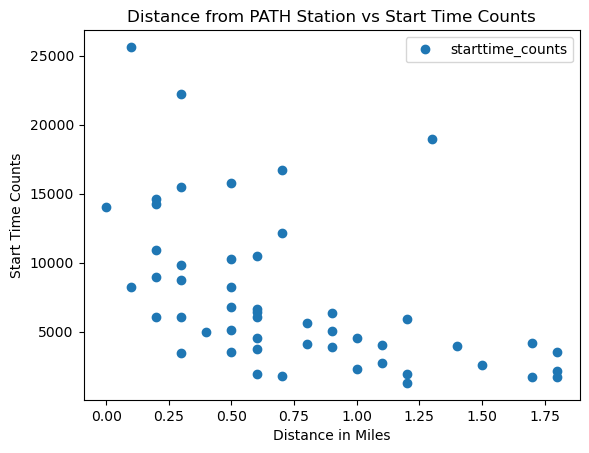

In [10]:
# Create scatterplot for 'Distance from nearest PATH station via Bicycle' and 'starttime_counts'
df_trips.plot(x = 'Distance from nearest PATH station via Bicycle', y='starttime_counts',style='o') 
plt.title('Distance from PATH Station vs Start Time Counts')  
plt.xlabel('Distance in Miles')  
plt.ylabel('Start Time Counts')  
plt.show()

#### Hypothesis: If a Citi Bike station is located farther from a PATH station, it will be less popular.

In [11]:
# Reshape variables into Numpy arrays and put into separate objects
X = df_trips['Distance from nearest PATH station via Bicycle'].values.reshape(-1,1)
y = df_trips['starttime_counts'].values.reshape(-1,1)

In [12]:
# View array for independent variable
X

array([[0.6],
       [1.1],
       [0.8],
       [0.9],
       [0.9],
       [0.6],
       [1.2],
       [0.2],
       [0. ],
       [0.1],
       [1.5],
       [0.7],
       [0.5],
       [0.4],
       [0.8],
       [1. ],
       [0.3],
       [0.1],
       [0.7],
       [0.2],
       [1.8],
       [0.6],
       [1. ],
       [1.8],
       [0.7],
       [0.5],
       [0.6],
       [0.5],
       [1.7],
       [1.2],
       [1.3],
       [1.2],
       [0.2],
       [0.3],
       [0.6],
       [0.9],
       [0.6],
       [0.5],
       [0.3],
       [0.2],
       [0.3],
       [1.1],
       [0.2],
       [1.4],
       [1.8],
       [0.5],
       [1.7],
       [0.5],
       [0.6],
       [0.3],
       [0.3]])

In [13]:
# View array for dependent variable
y

array([[ 1912],
       [ 4038],
       [ 5603],
       [ 3899],
       [ 6340],
       [ 6407],
       [ 1946],
       [10935],
       [14005],
       [ 8210],
       [ 2612],
       [ 1821],
       [ 5153],
       [ 4963],
       [ 4080],
       [ 2297],
       [ 6035],
       [25629],
       [16725],
       [14252],
       [ 3506],
       [ 3709],
       [ 4533],
       [ 1679],
       [12134],
       [ 6808],
       [ 6091],
       [ 3502],
       [ 4147],
       [ 1286],
       [18933],
       [ 5914],
       [ 6040],
       [15501],
       [ 6633],
       [ 5023],
       [ 4508],
       [10283],
       [ 8731],
       [14583],
       [22220],
       [ 2709],
       [ 8981],
       [ 3966],
       [ 2173],
       [15767],
       [ 1702],
       [ 8200],
       [10489],
       [ 9813],
       [ 3434]], dtype=int64)

In [14]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [15]:
# Create regression object
regression = LinearRegression()

In [16]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict values of y using X
y_predicted = regression.predict(X_test)

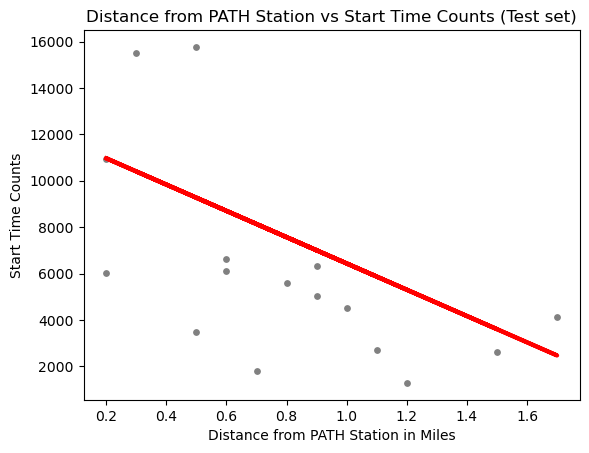

In [18]:
# Create Plot that shows regression line from model on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from PATH Station vs Start Time Counts (Test set)')
plot_test.xlabel('Distance from PATH Station in Miles')
plot_test.ylabel('Start Time Counts')
plot_test.show()

#### Observations: The regression line slopes downward, so it suggests that station popularity decreases as the distance from a PATH station increases. The regression line is a very poor fit.

In [19]:
# Create objects containing model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # Mean Squared Error (MSE)
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [20]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5665.44435597]]
Mean squared error:  13654412.426823273
R2 score:  0.2336312039336279


#### Observations: Statistics show that there is not a linear relationship between the variables.

In [21]:
# View array for y_predicted
y_predicted

array([[ 5302.02829669],
       [ 8134.75047467],
       [ 3602.39498989],
       [ 6435.11716788],
       [ 7568.20603908],
       [ 2469.3061187 ],
       [ 9267.83934587],
       [10967.47265266],
       [ 8701.29491027],
       [ 7001.66160348],
       [10400.92821706],
       [ 5868.57273228],
       [ 9267.83934587],
       [ 7001.66160348],
       [ 8701.29491027],
       [10967.47265266]])

In [22]:
# Create a dataframe comparing actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1286,5302.028297
1,1821,8134.750475
2,2612,3602.394990
3,4533,6435.117168
4,5603,7568.206039
5,4147,2469.306119
6,15767,9267.839346
7,6040,10967.472653
8,6091,8701.294910
9,6340,7001.661603


#### Observations: The model performed very poorly on the test set. The relationship between these variables cannot be explained by a straight regression line.

# 06. Compare how Regression fits Training Set

In [23]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
# Create objects containing summary statistics
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
# Print summary statistics
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5665.44435597]]
Mean squared error:  27031588.66695832
R2 score:  0.24041983792316646


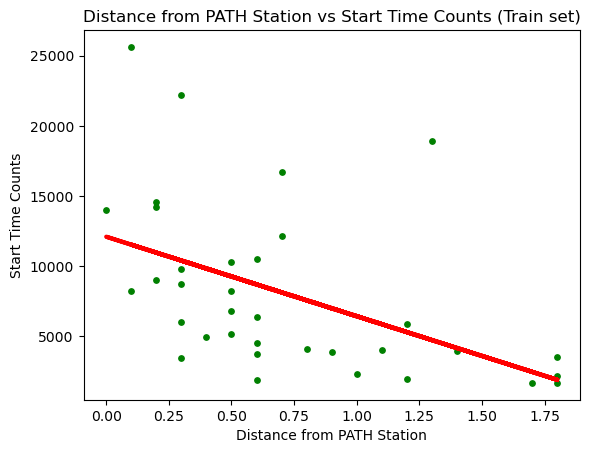

In [26]:
# Visualizing training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from PATH Station vs Start Time Counts (Train set)')
plot_test.xlabel('Distance from PATH Station')
plot_test.ylabel('Start Time Counts')
plot_test.show()